# <center> Visualizing Supply and Demand Curves to Determine Equilibrium Prices and Quantities </center>

Consider the supply-demand economy with the inverse supply curve given by  $p_s = {\sqrt{q_s} }$ and the inverse demand curve given by $p_d = 100e^{-q_d}$. 

The function below calculates consumer and producer curves, visualizes the market, and identifies equilibrium prices and quantities.

In [2]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed
import numpy as np
import datetime
import numpy as np
from scipy.interpolate import interp1d
import scipy.integrate as si
import matplotlib.pylab as plt
%matplotlib inline 
import math
print('packages loaded...')

packages loaded...


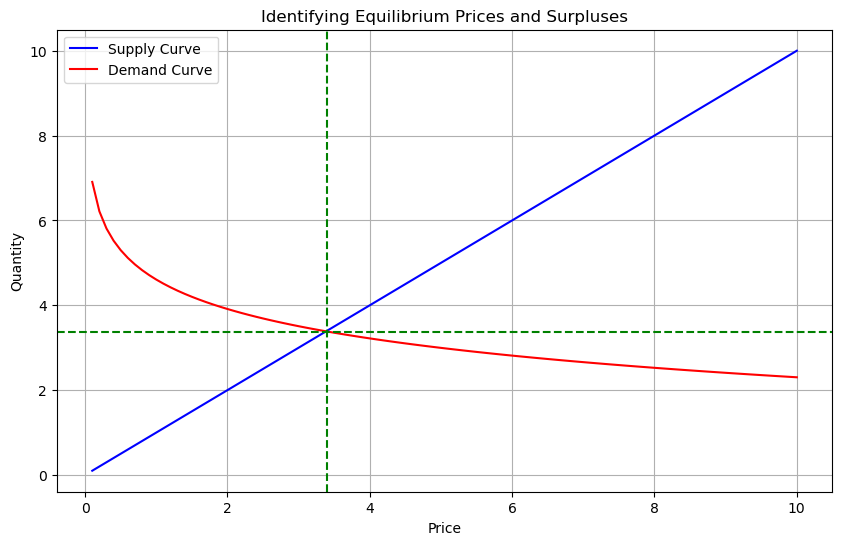

In [6]:
def q():
    #supply curve function
    def supplycurve(p, tax = 0):
        supply = (p - tax)
        return supply
    #demand curve function
    def demandcurve(p):
        p = np.clip(p, 0.01, None)  # This will avoid log(0) issues
        demand = np.log(100/p)
        return demand
    #create a list of prices
    prices  = np.linspace(0.1, 10, 100)
    
    # function to find equilibrium price and quantities
    def equilibrium(demand,supply, prices):
        # Calculate the absolute difference between supply and demand
        difference = np.abs(supply - demand)
        # Find the index of the minimum difference
        index = np.argmin(difference)
        equilibrium_price = round(prices[index],2)
        equilibrium_qtys = demand[index]
        return equilibrium_price, equilibrium_qtys

    # getting the necessary figures using the functions above.... 
    supply_values = supplycurve(prices)
    demand_values = demandcurve(prices)
    #values for tax implications...
    supply_values_tax = supplycurve(prices, 2)
    #getting x and y values for plot and calculations
    x,y = equilibrium(demand_values, supply_values, prices)
    x_tax ,y_tax = equilibrium(demand_values, supply_values_tax, prices)
    plt.figure(figsize=(10, 6))
    plt.plot(prices, supply_values, label='Supply Curve', color='blue')
    plt.plot(prices, demand_values, label='Demand Curve', color='red')
    plt.title('Identifying Equilibrium Prices and Surpluses')
    plt.xlabel('Price')
    plt.ylabel('Quantity')
    # Add equilibrium lines
    plt.axvline(x, color='green', linestyle='--', )
    plt.axhline(y, color='green', linestyle='--')
    plt.legend()
    plt.grid()
q()